# Clonal inference P5

In this notebook I run the clonal inference model on P5. This patient has the following alterations:


* DNMT3A
* NPM1 
* DEDD2

There is bulk data for myeloid cells and T cells separately 


## Import packages 

<br>




In [1]:
# Import packages
import os
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import itertools
import os
import pickle
import collections

import time
from datetime import datetime
from timeit import default_timer as timer
from datetime import timedelta

import pyro
import pyro.distributions as dist
import pyro.poutine as poutine
from pyro.infer import SVI, Trace_ELBO, TraceEnum_ELBO, config_enumerate
from pyro.optim import Adam, AdagradRMSProp
from torch.distributions import constraints
pyro.set_rng_seed(100)

# import helper functions and tree class form source code files (present in the same directory)
from helper_functions import *

In [2]:
torch.set_default_tensor_type(torch.cuda.DoubleTensor)
patient = "P5"

# Create tree class object

This class contains all functions required to run the model and to generate diagnostic plots. 

In [3]:
input_file = "../data/input_" + patient + ".json"
t = create_tree_class(input_file, name = patient, mult_samp = True, cnv_celltype = True, gpu = True)

# Run model


In [11]:
# select initial 2 mutations based on the proportion of cells covered
t.sel_mutation(initial = True)

tensor([0, 1])

In [12]:
t.names

['NPM1', 'DNMT3A', 'DEDD2']

## Initial tree with NPM1 & DNMT3A

Choosing best tree among 4 potential candidates
Model fit to tree 0 in 0m 52s
Model fit to tree 1 in 0m 53s
Model fit to tree 2 in 0m 53s
Model fit to tree 3 in 0m 52s
Tree [1] selected for mutations ['NPM1', 'DNMT3A']:
[tensor([[0., 0.],
        [0., 1.],
        [1., 1.]])]
Total run time 0h 3m 32s


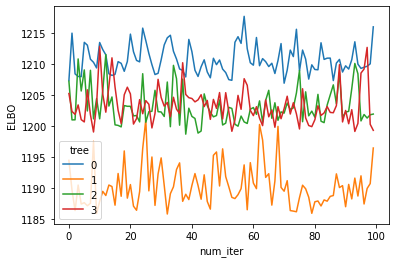

In [14]:
t.select_tree(num_iter = 350, init = 250, print_elbo = True)

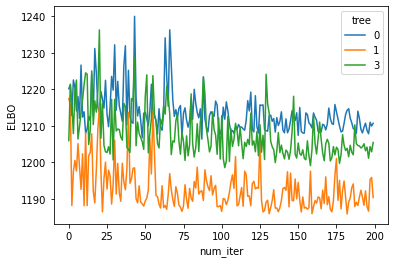

In [15]:
t.print_elbo(num_iter = 300, init = 100, include = [0,1,3])

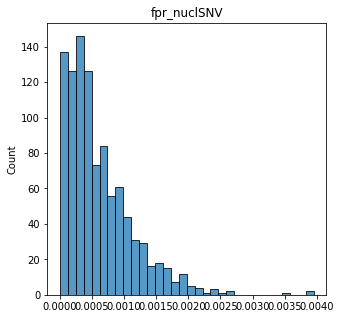

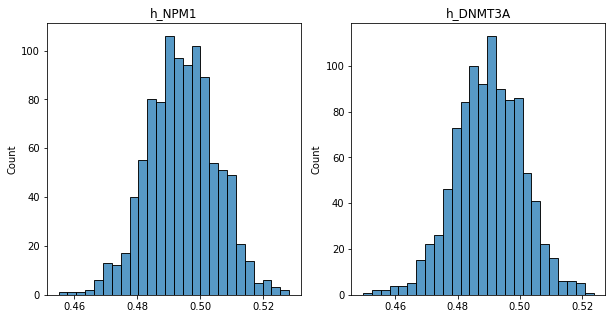

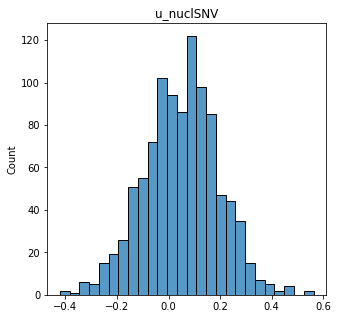

In [16]:
t.plot_posterior("all", 1, 1000)

## Add DEDD2


In [17]:
t.add_mutation()
t.select_tree(num_iter = 300, init = 200)

DEDD2 added to the tree
Choosing best tree among 7 potential candidates
Model fit to tree 0 in 1m 0s
Model fit to tree 1 in 0m 59s
Model fit to tree 2 in 0m 59s
Model fit to tree 3 in 1m 0s
Model fit to tree 4 in 1m 0s
Model fit to tree 5 in 1m 0s
Model fit to tree 6 in 1m 0s
Trees [1, 2, 4] selected for mutations ['NPM1', 'DNMT3A', 'DEDD2']
tensor([[0., 0., 0.],
        [0., 0., 1.],
        [0., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 1., 0.],
        [0., 1., 1.],
        [1., 1., 1.]])
Total run time 0h 7m 0s


# Compute clonal assignments

In [18]:
for i in range(len(t.tree_indices)):
    t.clonal_assignment(tree = i)

Computing clonal assignment probabilities for tree 0
Clonal assignment probabilities computed in 1m and 2s
Computing clonal assignment probabilities for tree 1
Clonal assignment probabilities computed in 1m and 2s
Computing clonal assignment probabilities for tree 2
Clonal assignment probabilities computed in 1m and 3s


In [21]:
# export object as pickle
t.export_pickle("../../../../../clonal_analysis_joint/prob_modelling/svi_objects/"+patient+".pickle")

Tree object saved as pickle!
